**Exercise 1**

Read data from the csv to create the dataset

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

FullSet_0 = np.loadtxt("1000ceros.csv", delimiter=",")
FullSet_1 = np.loadtxt("1000unos.csv", delimiter=",")

FullLabel_0 = np.zeros((FullSet_0.shape[0]))
FullLabel_1 = np.ones((FullSet_1.shape[0]))

FullSet   = np.append(FullSet_0,   FullSet_1,   axis=0)
FullLabel = np.append(FullLabel_0, FullLabel_1, axis=0)

print("FullSet : ", FullSet.shape)
print("FullLabel: ", FullLabel.shape)

print("Load dataset... done.")

FullSet :  (2000, 784)
FullLabel:  (2000,)
Load dataset... done.


Normalize the data

FullSet : (2000, 28, 28)


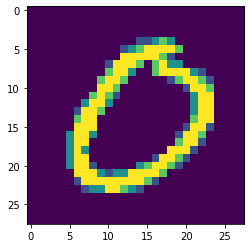

In [ ]:

def normalize_input(data):
  size = 28
  df = np.array(data)
  out = []
  if (data.ndim == 2):
    for i in df:
      out.append(np.reshape(i, (size, size)) /255)
  else:
    out = data
  return(np.array(out))

FullSet = normalize_input(FullSet)
print("FullSet :", FullSet.shape)

plt.imshow(FullSet[555])

Split train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(FullSet, FullLabel, test_size=0.2)

print("x_train: ", x_train.shape, "y_train", y_train.shape)
print("x_test: ", x_test.shape, "y_test", y_test.shape)

x_train:  (1600, 28, 28) y_train (1600,)
x_test:  (400, 28, 28) y_test (400,)


**Exercise 2**
Create the model using keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()   #Variable que tiene un paquete de como esta construida la red
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(128, activation=tf.nn.relu))
model.add(keras.layers.Dense(2, activation=tf.nn.softmax))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 100,738
Trainable params: 100,738
Non-trainable params: 0
_________________________________________________________________


**Excercise 3**
Train the model with the train dataset

In [ ]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, verbose=True)

Epoch 1/10
50/50 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9272
Epoch 2/10
50/50 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3/10
50/50 [==============================] - 0s 2ms/step - loss: 8.9752e-04 - accuracy: 1.0000
Epoch 4/10
50/50 [==============================] - 0s 2ms/step - loss: 4.6175e-04 - accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 0s 2ms/step - loss: 3.7107e-04 - accuracy: 1.0000
Epoch 6/10
50/50 [==============================] - 0s 2ms/step - loss: 2.0423e-04 - accuracy: 1.0000
Epoch 7/10
50/50 [==============================] - 0s 2ms/step - loss: 1.1257e-04 - accuracy: 1.0000
Epoch 8/10
50/50 [==============================] - 0s 2ms/step - loss: 1.3428e-04 - accuracy: 1.0000
Epoch 9/10
50/50 [==============================] - 0s 2ms/step - loss: 9.8797e-05 - accuracy: 1.0000
Epoch 10/10
50/50 [==============================] - 0s 2ms/step - loss: 7.3116e-05 - accu

**Exercise 4**
* Use the model to make predictions
* Create a graphic with the results of each prediction


Prediction:  0
Real:  0.0


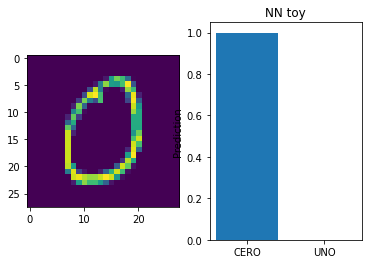

In [ ]:
import matplotlib.pyplot as plt
import random as randy

image_num = randy.randrange(0,400)
predictions = model.predict(x_test)
estimated_label = np.argmax(predictions[image_num])

print("Prediction: ", estimated_label)
print("Real: ", y_test[image_num])

x = ["CERO", "UNO"]

plt.subplot(1,2,1), plt.imshow(x_test[image_num])
plt.subplot(1,2,2), plt.bar(x, predictions[image_num])
plt.title('NN toy')
plt.ylabel('Prediction')
plt.show()